<a href="https://colab.research.google.com/github/YuriFBorges/PROGRAMACAO-ORIENTADA-A-OBJETOS---ECT2540/blob/main/Yuri_Atividade_1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Relatório:**

Este relatório apresenta a atividade 1 da disciplina Tópicos Avançados em Informática I, realizada por Yuri Ferreira Borges. O objetivo desta atividade foi aplicar um modelo de multilayer perceptron (MLP) na base de dados de diabetes, utilizando informações de glicose, insulina e Diabetes Pedigree Function.

Foram utilizados 100 épocas, uma camada escondida que recebe uma entrada de dimensão 3 e possui 4 neurônios além de uma camada de saída com 1 neurônio. Com isso, o modelo foi capaz de alcançar uma acurácia de aproximadamente 77,60% em relação aos resultados originais da base de dados. Ao tentar adicionar o atributo Age ao modelo, houve uma queda na acurácia do MLP, obtendo uma acurácia de aproximadamente 76,04%. Por essa razão, optei por utilizar somente os três atributos originais para o treinamento do modelo.

Este estudo destaca a importância da escolha adequada dos atributos para o desempenho do modelo de MLP. Novas abordagens poderiam ser usadas para melhorar o desempenho do modelo em relação a outras variáveis ​​ou mesmo com a combinação de diferentes atributos.





In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [112]:
dataset = pd.read_csv("https://raw.githubusercontent.com/YuriFBorges/TOPICOS-AVANCADOS-EM-INFORMATICA-I---ECT2702/main/atividade1/diabetes.csv")
dataset.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
#Dados
X = dataset.loc[:,['Insulin', 'Glucose','DiabetesPedigreeFunction']].values
y = dataset['Outcome'].values
print("X =",X[0:10])
print("\ny = ",y[0:10])


X = [[0.000e+00 1.480e+02 6.270e-01]
 [0.000e+00 8.500e+01 3.510e-01]
 [0.000e+00 1.830e+02 6.720e-01]
 [9.400e+01 8.900e+01 1.670e-01]
 [1.680e+02 1.370e+02 2.288e+00]
 [0.000e+00 1.160e+02 2.010e-01]
 [8.800e+01 7.800e+01 2.480e-01]
 [0.000e+00 1.150e+02 1.340e-01]
 [5.430e+02 1.970e+02 1.580e-01]
 [0.000e+00 1.250e+02 2.320e-01]]

y =  [1 0 1 0 1 0 1 0 1 1]


In [114]:
#Separando entre conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [115]:
#Normalização
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [116]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 3, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [117]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
576/576 [==============================] - 2s 2ms/step - loss: 0.6803 - accuracy: 0.6406
Epoch 2/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6627 - accuracy: 0.6424
Epoch 3/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6543 - accuracy: 0.6424
Epoch 4/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6504 - accuracy: 0.6424
Epoch 5/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6448 - accuracy: 0.6424
Epoch 6/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.6406
Epoch 7/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6323 - accuracy: 0.6424
Epoch 8/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6257 - accuracy: 0.6458
Epoch 9/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6183 - accuracy: 0.6545
Epoch 10/100
576/576 [==============================] - 1s 2ms/step - loss: 0.6123 - accura

In [118]:
#Avaliação do modelo:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

6/6 [==============================] - 0s 2ms/step
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.8800911 ]
 [0.1971051 ]
 [0.07198431]
 [0.7550542 ]
 [0.3031547 ]
 [0.07232118]
 [0.7222234 ]
 [0.8246212 ]
 [0.637286  ]
 [0.14954345]
 [0.75012654]
 [0.8527081 ]
 [0.35370535]
 [0.3067491 ]
 [0.07462712]
 [0.31319308]
 [0.8302512 ]
 [0.05730967]
 [0.42252532]
 [0.17005831]
 [0.58472365]
 [0.37509006]
 [0.16254164]
 [0.04504259]
 [0.15127468]
 [0.37606317]
 [0.22913656]
 [0.7515706 ]
 [0.22178537]
 [0.20512562]
 [0.510318  ]
 [0.18757078]
 [0.22690469]
 [0.42258024]
 [0.24065924]]


In [119]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [120]:
y_pred_bin =  np.array(y_pred_bin)

In [121]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [122]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  77.08333333333334 %


In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[114  16]
 [ 28  34]]


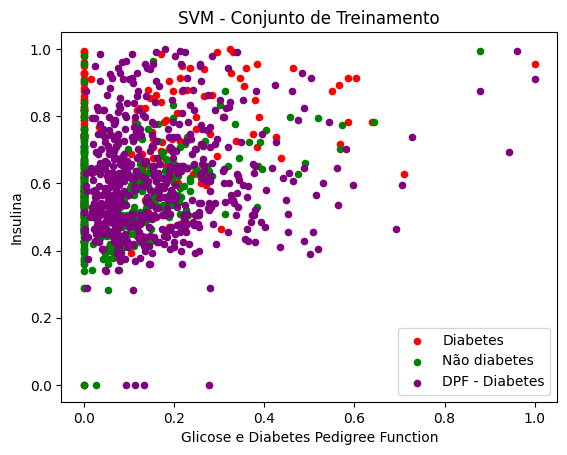

In [124]:
Glucose_neg = X_train[y_train == 0, 0]
Insulin_neg = X_train[y_train == 0, 1]
DiabetesPedigreeFunction_neg = X_train[y_train == 0, 2]
Glucose_pos = X_train[y_train == 1, 0]
Insulin_pos = X_train[y_train == 1, 1]
DiabetesPedigreeFunction_pos = X_train[y_train == 1, 2]

plt.scatter(Glucose_pos, Insulin_pos, s=20, color='red', label='Diabetes')
plt.scatter(Glucose_neg, Insulin_neg, s=20, color='green', label='Não diabetes')
plt.scatter(DiabetesPedigreeFunction_pos, Insulin_pos, s=20, color='purple', label='DPF - Diabetes')
plt.scatter(DiabetesPedigreeFunction_neg, Insulin_neg, s=20, color='purple')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Glicose e Diabetes Pedigree Function')
plt.ylabel('Insulina')
plt.legend()
plt.show()


76/76 [==============================] - 0s 1ms/step


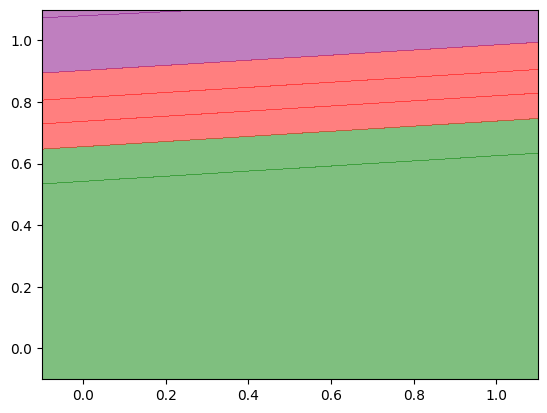

In [125]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx, vy)

y_pred_mesh = classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red','purple')))

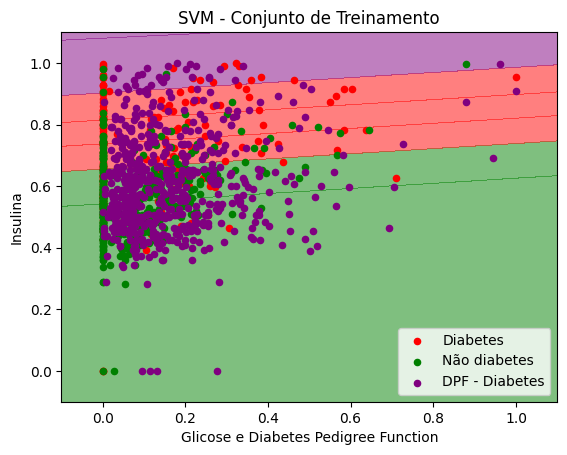

In [126]:
Glucose_neg = X_train[y_train == 0, 0]
Insulin_neg = X_train[y_train == 0, 1]
DiabetesPedigreeFunction_neg = X_train[y_train == 0, 2]
Glucose_pos = X_train[y_train == 1, 0]
Insulin_pos = X_train[y_train == 1, 1]
DiabetesPedigreeFunction_pos = X_train[y_train == 1, 2]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red', 'purple')))

plt.scatter(Glucose_pos, Insulin_pos, s=20, color='red', label='Diabetes')
plt.scatter(Glucose_neg, Insulin_neg, s=20, color='green', label='Não diabetes')
plt.scatter(DiabetesPedigreeFunction_pos, Insulin_pos, s=20, color='purple', label='DPF - Diabetes')
plt.scatter(DiabetesPedigreeFunction_neg, Insulin_neg, s=20, color='purple')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Glicose e Diabetes Pedigree Function')
plt.ylabel('Insulina')
plt.legend()
plt.show()

In [127]:
y_pred_mesh[30:35,40:45]

array([[0.18546876, 0.18301013, 0.18057686, 0.17816888, 0.17578611],
       [0.21709026, 0.21432272, 0.21158095, 0.20886496, 0.20617466],
       [0.2524321 , 0.24935754, 0.24630809, 0.24328382, 0.24028488],
       [0.29138628, 0.28802007, 0.2846771 , 0.28135762, 0.27806175],
       [0.3336686 , 0.33004144, 0.32643434, 0.3228477 , 0.3192818 ]],
      dtype=float32)